In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression





In [2]:
df = pd.read_csv("house_train.csv")
df.head()

,ID,Location,Paint_Color,Lot_Width,Lot_Depth,Year_Sold,Year_Built,Living_Area,Num_Rooms,Price
0,1,Suburb,Green,134,NaN,2020,1990,813,6,1548800.0
1,2,Downtown,Green,76,93.0,2025,2019,3093,6,1974800.0
2,3,Suburb,Yellow,91,83.0,2019,2003,2845,3,2466950.0
3,4,Suburb,Green,26,21.0,2022,1995,1837,3,968700.0
4,5,Rural,Red,138,85.0,2017,1980,4928,8,2570700.0


In [3]:
print(df[["Location","Paint_Color"]].nunique())
print(df[["Location"]].value_counts())
print(df["Paint_Color"].value_counts())

Location       3
Paint_Color    4
dtype: int64
Location
Suburb      982
Rural       615
Downtown    403
Name: count, dtype: int64
Paint_Color
Red       537
Yellow    530
Green     475
Blue      458
Name: count, dtype: int64


In [4]:
#df['Location'].replace(['Suburb', 'Rural', 'Downtown'],
#                        [0, 1,2], inplace=True)
#df['Paint_Color'].replace(['Red', 'Yellow', 'Green', "Blue"],
#                        [0, 1,2,3], inplace=True)

In [5]:
df.head()

,ID,Location,Paint_Color,Lot_Width,Lot_Depth,Year_Sold,Year_Built,Living_Area,Num_Rooms,Price
0,1,Suburb,Green,134,NaN,2020,1990,813,6,1548800.0
1,2,Downtown,Green,76,93.0,2025,2019,3093,6,1974800.0
2,3,Suburb,Yellow,91,83.0,2019,2003,2845,3,2466950.0
3,4,Suburb,Green,26,21.0,2022,1995,1837,3,968700.0
4,5,Rural,Red,138,85.0,2017,1980,4928,8,2570700.0


In [6]:
df.isna().sum()

ID               0
Location         0
Paint_Color      0
Lot_Width        0
Lot_Depth      279
Year_Sold        0
Year_Built       0
Living_Area      0
Num_Rooms        0
Price            0
dtype: int64

In [7]:
df.dropna(inplace=True)

<Axes: xlabel='Location', ylabel='Price'>

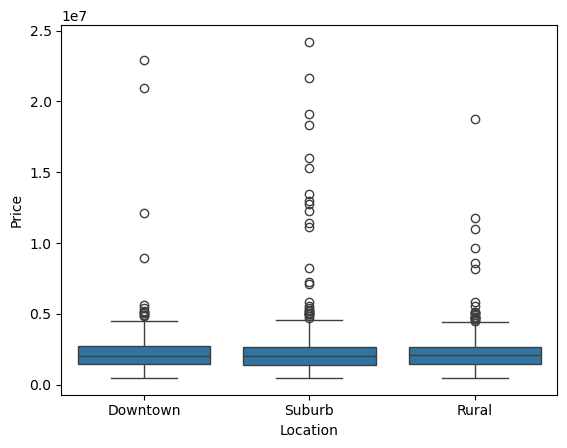

In [8]:
#lets checks pattrens

sns.boxplot(data=df, x= "Location", y = "Price")
    
    

There is no major change in price between suburban, downtown or rural median is same, only outliers are more in suburbs

<Axes: xlabel='Paint_Color', ylabel='Price'>

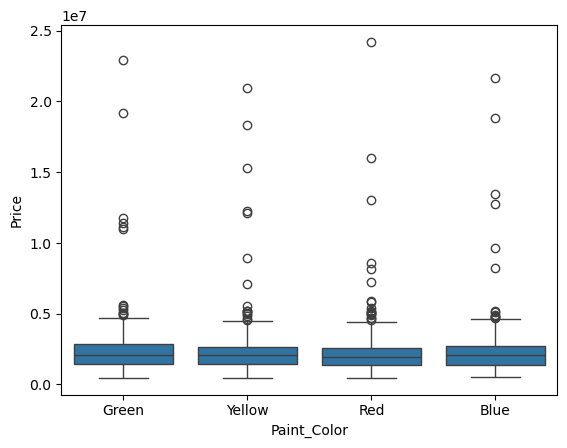

In [9]:
sns.boxplot(data=df, x= "Paint_Color", y = "Price")

Same with colors, although Red has highest outlier

<Axes: xlabel='Lot_Depth', ylabel='Price'>

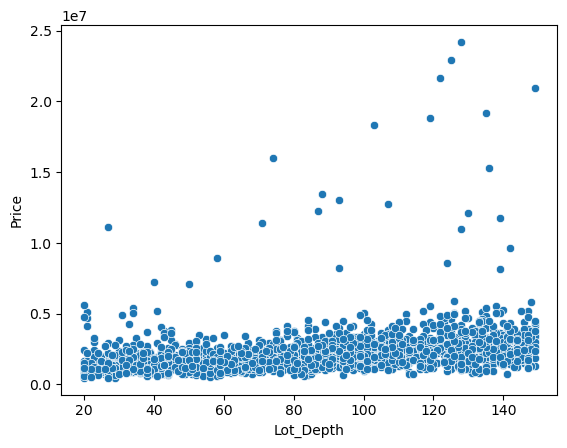

In [10]:
sns.scatterplot(data=df, x= "Lot_Depth", y = "Price")

There is no significant correlation although a slight positive correlation in some outliers

<Axes: xlabel='Lot_Width', ylabel='Price'>

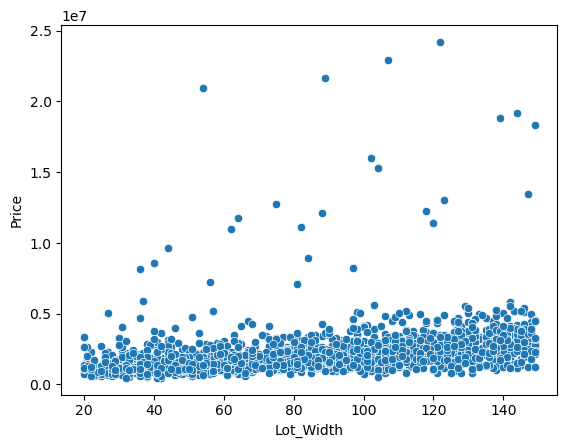

In [11]:
sns.scatterplot(data=df, x= "Lot_Width", y = "Price")

There is no significant correlation although a slight positive correlation in some outliers

<Axes: xlabel='Year_Sold', ylabel='Price'>

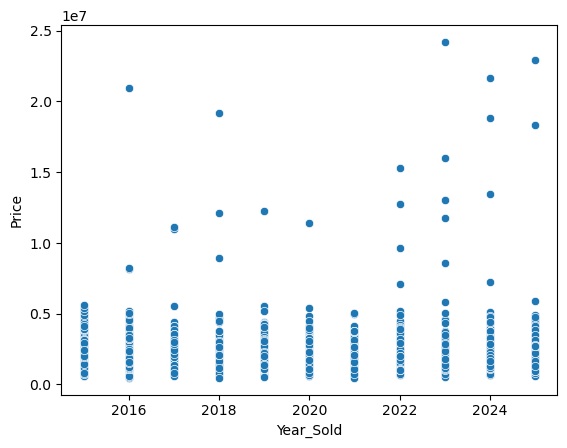

In [12]:
sns.scatterplot(data=df, x= "Year_Sold", y = "Price")

some outliers are positive although no significant correlation

<Axes: xlabel='Year_Built', ylabel='Price'>

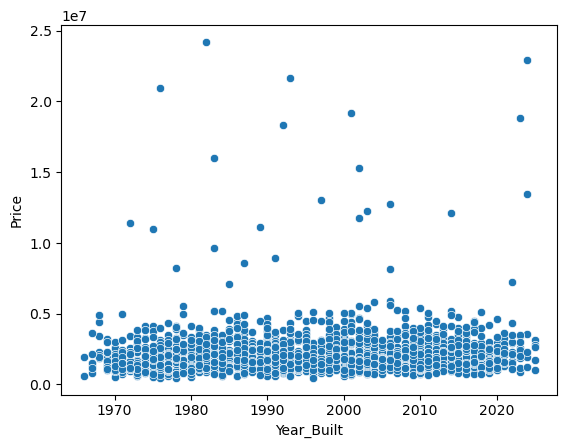

In [13]:
sns.scatterplot(data=df, x= "Year_Built", y = "Price")

No significant correlation

<Axes: xlabel='Living_Area', ylabel='Price'>

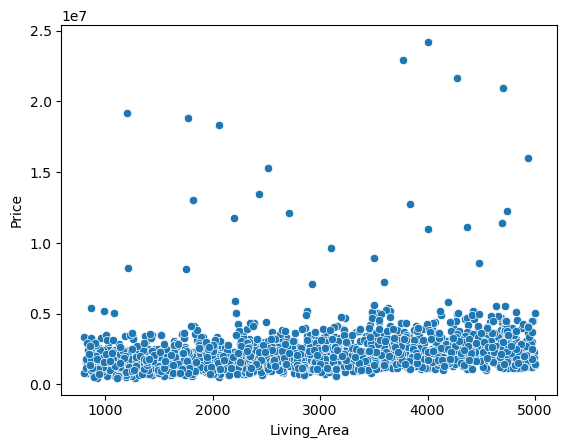

In [14]:
sns.scatterplot(data=df, x= "Living_Area", y = "Price")


Bit positive

<Axes: xlabel='Num_Rooms', ylabel='Price'>

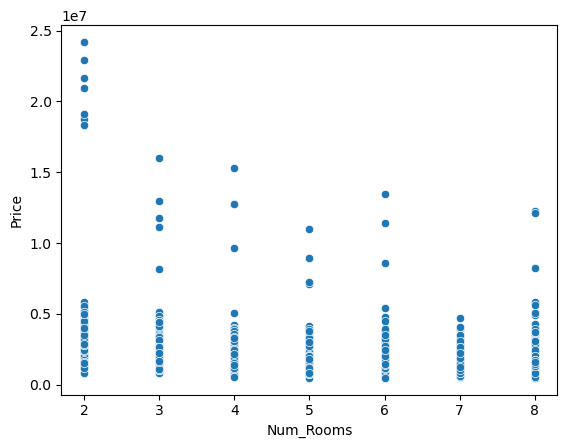

In [15]:
sns.scatterplot(data=df, x= "Num_Rooms", y = "Price")


no correlation

In [16]:
df[[ "Lot_Width",
    "Lot_Depth",
    "Year_Sold",
    "Year_Built",
    "Living_Area",
    "Num_Rooms",
   "Price"]].corr()

,Lot_Width,Lot_Depth,Year_Sold,Year_Built,Living_Area,Num_Rooms,Price
Lot_Width,1.000000,0.044529,0.000994,0.036204,-0.005504,-0.004757,0.304806
Lot_Depth,0.044529,1.000000,-0.003951,0.028042,0.000232,0.007917,0.316781
Year_Sold,0.000994,-0.003951,1.000000,0.192287,0.030138,-0.003507,0.042370
Year_Built,0.036204,0.028042,0.192287,1.000000,-0.017145,-0.046958,0.058403
Living_Area,-0.005504,0.000232,0.030138,-0.017145,1.000000,-0.001147,0.217972
Num_Rooms,-0.004757,0.007917,-0.003507,-0.046958,-0.001147,1.000000,-0.264514
Price,0.304806,0.316781,0.042370,0.058403,0.217972,-0.264514,1.000000


lets go with numerical correlation values, being lot_width, lot_depth, number of rooms and living area having higher correlation

In [17]:
df_clean = df.dropna()


features = [
    "Lot_Width",
    "Lot_Depth",
    "Living_Area",
    "Num_Rooms"]

target = "Price"

X = df_clean[features]

y = df_clean[target]

In [18]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
df_test = pd.read_csv("house_test.csv")
df_test.head()
df_test.isna().sum()

ID             0
Location       0
Paint_Color    0
Lot_Width      0
Lot_Depth      0
Year_Sold      0
Year_Built     0
Living_Area    0
Num_Rooms      0
dtype: int64

In [20]:
X_test = df_test[features]


In [21]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred)

,0
0,2.193823e+06
1,2.911450e+06
2,6.190338e+05
3,2.662366e+06
4,2.390120e+06
...,...
995,3.405315e+06
996,1.164690e+06
997,2.686285e+06
998,3.381983e+06


In [22]:
df_test["Price"] = pd.DataFrame(y_pred)
df_test.head()

,ID,Location,Paint_Color,Lot_Width,Lot_Depth,Year_Sold,Year_Built,Living_Area,Num_Rooms,Price
0,2001,Rural,Green,106,131,2023,1980,1076,7,2.193823e+06
1,2002,Rural,Green,98,23,2016,1984,4828,2,2.911450e+06
2,2003,Downtown,Green,42,45,2020,2014,1405,5,6.190338e+05
3,2004,Rural,Red,100,36,2018,1991,4853,4,2.662366e+06
4,2005,Rural,Yellow,67,111,2021,2021,3512,6,2.390120e+06


In [23]:
submission_df = df_test[["ID","Price"]]
submission_df.to_csv("house_predicted.csv", index=False)

In [24]:
verify_submission = pd.read_csv("house_predicted.csv")
verify_submission.head()

,ID,Price
0,2001,2.193823e+06
1,2002,2.911450e+06
2,2003,6.190338e+05
3,2004,2.662366e+06
4,2005,2.390120e+06


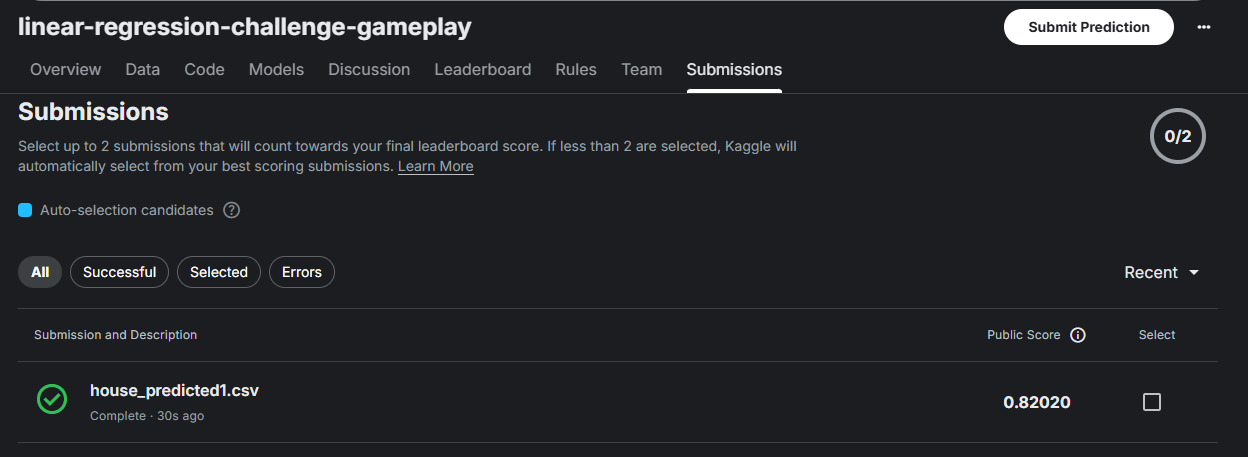

Good start!!